In [1]:
import json 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [2]:
# Create an empty list to store data from all JSON files
data_list = []

# Get the file path of the directory containing the JSON files
json_dir = '../data/'

# Iterate over each file in the directory
for filename in os.listdir(json_dir):
    if filename.endswith('.json'):
        # Extract the position number from the filename
        position = int(filename.split('.')[0].replace('position', ''))
        
        # Read the JSON file into a DataFrame
        file_path = os.path.join(json_dir, filename)
        
        df = pd.read_json(file_path)
        
        # Add a new column 'position' with the value of the position number
        df['position'] = position
        
        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_list)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

In [3]:
# Sort the combined_df DataFrame by the 'position' column in ascending order
combined_df_sorted = combined_df.sort_values('position')

# Reset the index of the sorted DataFrame
combined_df_sorted.reset_index(drop=True, inplace=True)

In [4]:
# Define a function to calculate the percentage quality
def calculate_percentage(quality):
    numerator, denominator = map(int, quality.split('/'))
    return int((numerator / denominator) * 100)

# Add a new column 'percentage_quality' based on the 'quality' column
combined_df_sorted['percentage_quality'] = combined_df_sorted['quality'].apply(calculate_percentage)

In [5]:
combined_df_sorted

,ssid,quality,signal,mac,position,percentage_quality
0,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100
1,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100
2,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100
3,NOKIA-402343AC9C25-5,70/70,-25,40:23:43:AC:9C:32,1,100
4,NOKIA-402343AC9C25-5,70/70,-26,40:23:43:AC:9C:32,1,100
...,...,...,...,...,...,...
1095,NOKIA-402343AC9C25-5,59/70,-51,40:23:43:AC:9C:32,11,84
1096,NOKIA-402343AC9C25-5,54/70,-56,40:23:43:AC:9C:32,11,77
1097,NOKIA-402343AC9C25-5,54/70,-56,40:23:43:AC:9C:32,11,77
1098,NOKIA-402343AC9C25-5,53/70,-57,40:23:43:AC:9C:32,11,75


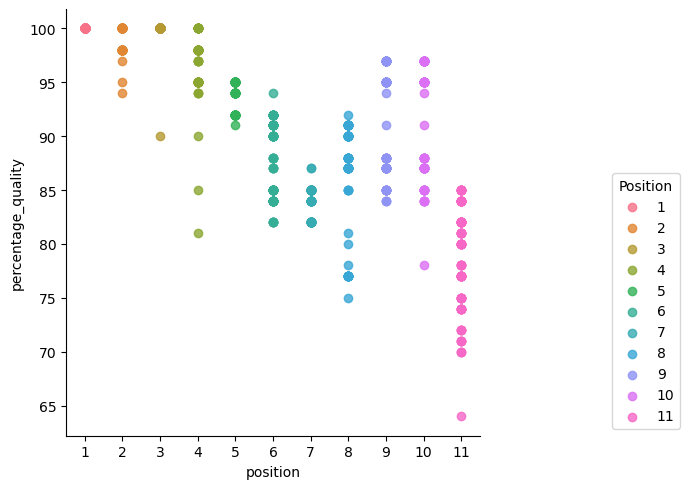

In [20]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( 
    x="position", 
    y="percentage_quality", 
    data=combined_df_sorted, 
    fit_reg=True, 
    hue='position', 
    legend=False
)

# Set the x-axis ticks to show all integer values
plt.xticks(range(1, len(combined_df_sorted['position'].unique()) + 1))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0), title='Position')

plt.show()

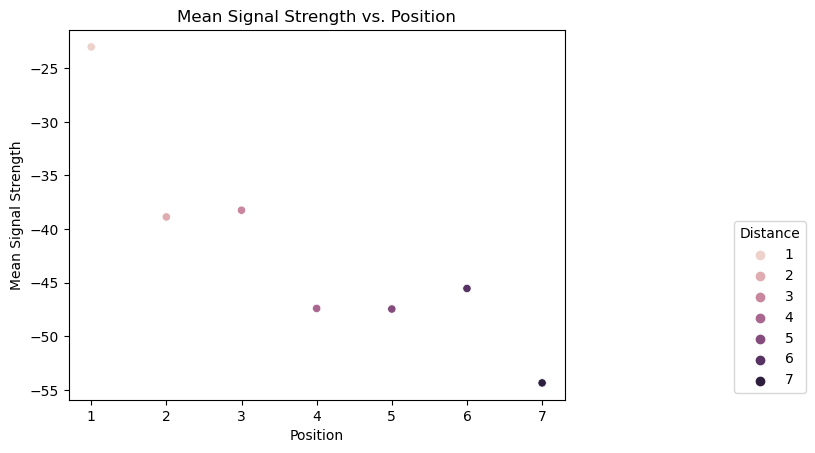

In [22]:
# Create a scatter plot with position and mean signal strength
sns.scatterplot(x=ordered_distances, y=mean_signal, hue=ordered_distances)

# Set the x-axis ticks to show all integer values
plt.xticks(range(1, len(ordered_distances) + 1))

# Set the labels and title
plt.xlabel('Position')
plt.ylabel('Mean Signal Strength')
plt.title('Mean Signal Strength vs. Position')

# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0), title='Distance')

# Show the plot
plt.show()

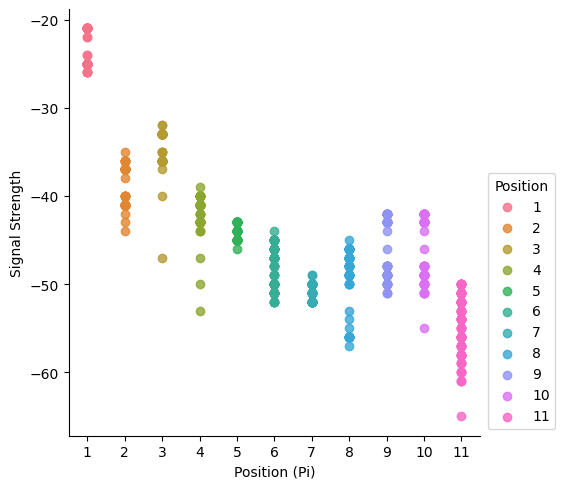

In [28]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( 
    x="position", 
    y="signal", 
    data=combined_df_sorted, 
    fit_reg=True, 
    hue='position', 
    legend=False
)

# Set the x-axis ticks to show all integer values
plt.xticks(range(1, len(combined_df_sorted['position'].unique()) + 1))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.0), title='Position')

plt.xlabel('Position (Pi)')
plt.ylabel('Signal Strength')

plt.show()

In [8]:
# Define a dictionary to map position to distance in meters
distance_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 3,
    5: 4,
    6: 5,
    7: 4,
    8: 5,
    9: 5,
    10: 6,
    11: 7
}

# Add a distance column based on the position column
combined_df_sorted['distance(m)'] = combined_df_sorted['position'].map(distance_mapping)

# Print the updated DataFrame
combined_df_sorted

,ssid,quality,signal,mac,position,percentage_quality,distance(m)
0,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100,1
1,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100,1
2,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100,1
3,NOKIA-402343AC9C25-5,70/70,-25,40:23:43:AC:9C:32,1,100,1
4,NOKIA-402343AC9C25-5,70/70,-26,40:23:43:AC:9C:32,1,100,1
...,...,...,...,...,...,...,...
1095,NOKIA-402343AC9C25-5,59/70,-51,40:23:43:AC:9C:32,11,84,7
1096,NOKIA-402343AC9C25-5,54/70,-56,40:23:43:AC:9C:32,11,77,7
1097,NOKIA-402343AC9C25-5,54/70,-56,40:23:43:AC:9C:32,11,77,7
1098,NOKIA-402343AC9C25-5,53/70,-57,40:23:43:AC:9C:32,11,75,7


In [11]:
# Create a new DataFrame with just signal distance and position
signal_df = combined_df_sorted.loc[:, ['signal', 'distance(m)', 'position']]

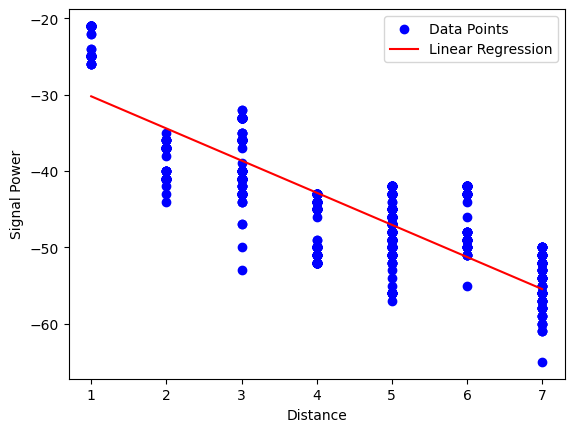

In [14]:
import scipy.stats as stats

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(signal_df['distance(m)'], signal_df['signal'])

# Create a scatter plot of distance vs. signal
plt.scatter(signal_df['distance(m)'], signal_df['signal'], color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(signal_df['distance(m)'], intercept + slope * signal_df['distance(m)'], color='red', label='Linear Regression')

# Add labels and a legend to the plot
plt.xlabel('Distance')
plt.ylabel('Signal Power')
plt.legend()

# Show the plot
plt.show()


-4.20685294117647


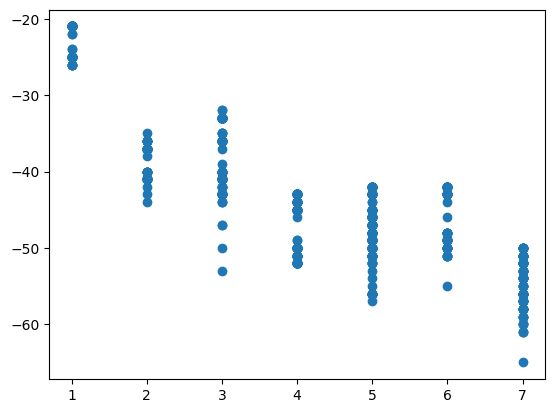

In [16]:
# Create a scatter plot of the signal vs. distance data
plt.scatter(signal_df['distance(m)'], signal_df['signal'])

# Fit a line to the data using the least squares method
line = np.polyfit(signal_df['distance(m)'], signal_df['signal'], 1)

# The slope of the line is the propagation exponent
propagation_exponent = line[0]

print(propagation_exponent)

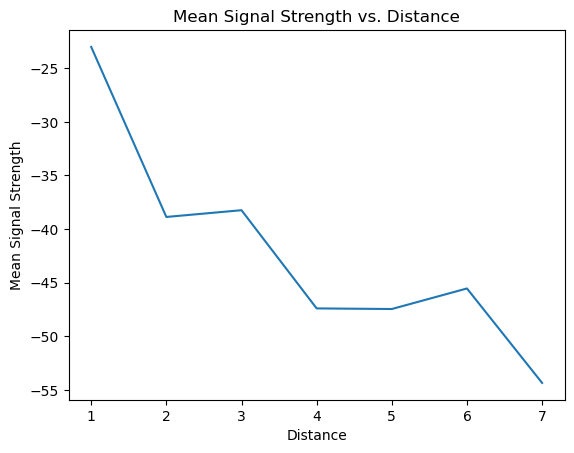

In [19]:
df = combined_df_sorted.copy()

# Calculate the mean signal strength for each distance
mean_signal = df.groupby('distance(m)')['signal'].mean()

# Get the ordered distances
ordered_distances = mean_signal.index

# Create the scatter plot
plt.plot(ordered_distances, mean_signal)

# Set the labels and title
plt.xlabel('Distance')
plt.ylabel('Mean Signal Strength')
plt.title('Mean Signal Strength vs. Distance')

# Show the plot
plt.show()